In [1]:
import csv
import numpy as np
from numpy import diff
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import asarray as ar,exp
import math
import pandas as pd 
from pandas import DataFrame, read_csv


In [2]:
cd /Users/austinmcdonald/Desktop/data/NaI test/CS137/little crystal/50ohm

/Users/austinmcdonald/Desktop/data/NaI test/CS137/little crystal/50ohm


In [3]:
os.listdir()

['.DS_Store',
 'Cs137 Spectrum3.pdf',
 'Cs_137_Coupled_50ohm_1.2kV.jpg',
 'Cs_137_Coupled_50ohm_1.2kV1.jpg',
 'F1Coupled_Area_Hist_1.2kV_50ohm00000.csv',
 'F1Coupled_Area_Hist_1.2kV_50ohm00001.csv',
 'F2Coupled_pulse_Hist_1.2kV_50ohm00000.csv']

In [4]:
dat1 = np.genfromtxt('F1Coupled_Area_Hist_1.2kV_50ohm00000.csv',delimiter=',',skip_header=1,skip_footer=315)
dat2 = np.genfromtxt('F1Coupled_Area_Hist_1.2kV_50ohm00001.csv',delimiter=',',skip_header=1,skip_footer=315)
dat = dat1+dat2

data = np.flipud(dat[:,1])
#backg = np.flipud(BG[:,1])
len(data)

4685

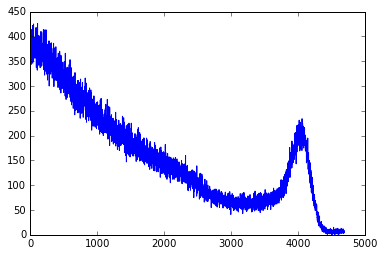

In [5]:
xvals = np.arange(1,len(data)+1)
#plt.xlim([2400,3700])
plt.plot(xvals,data)
plt.show()

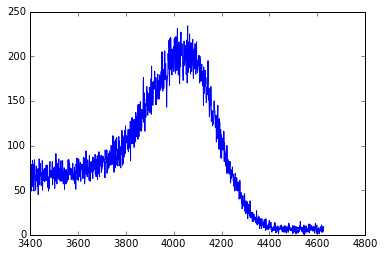

In [6]:
xcut = 3400
ycut = 4627

data0 = data[xcut:ycut]
xval0 = xvals[xcut:ycut]
plt.plot(xval0,data0)
plt.show()

Peak = 3969.15047451


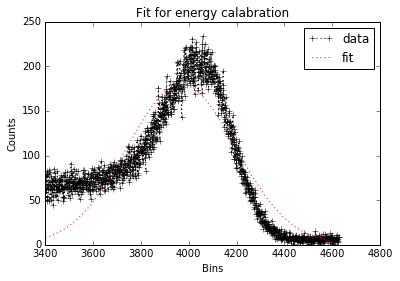

In [7]:
x = xval0
y = data0

ypeak = max(y)
position = np.where(y == y.max())
pos = position[0][0]
xpeak = x[pos]


def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[ypeak,xpeak,1])

plt.plot(x,y,'k+:',label='data')
plt.plot(x,gaus(x,*popt),'r:',label='fit')
plt.legend()
plt.title('Fit for energy calabration')
plt.xlabel('Bins')
plt.ylabel('Counts')
print('Peak =',popt[1])
plt.show()

In [8]:
print(xpeak+569)
print(3969 -3400)


4627
569


In [9]:
Tarea = np.sum(data0)
Tarea

105142.0

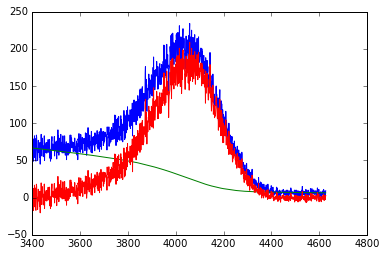

In [10]:
lsub= 100
rsub= 100
le = len(data0)
BackBig = data0[0:lsub]
BackSmall = data0[le-rsub:le]
backB = np.sum(BackBig)/lsub
backS = np.sum(BackSmall)/rsub

Fracarea = np.cumsum(data0)
Farea = Fracarea/Tarea

background = (1-Farea)*backB + Farea*backS
test = data0 - background


plt.plot(xval0,data0)
plt.plot(xval0,background)
plt.plot(xval0,test)
plt.show()

In [11]:
test11=test[392:900]
xval11=xval0[392:900]

In [12]:
test[1000]

0.72592008902246885

Peak Position= 4038.45935636
Peak Position= 4038.45935636


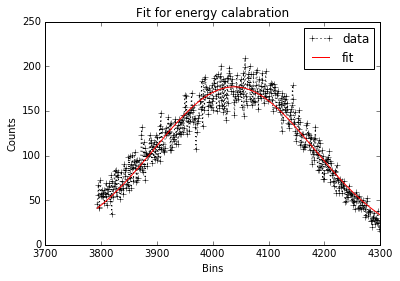

In [13]:
#x = xval0
#y = test
x=xval11
y=test11
ypeak = max(y)
position = np.where(y == y.max())
pos = position[0][0]
xpeak = x[pos]


def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[ypeak,xpeak,1])

fitted = popt

plt.plot(x,y,'k+:',label='data')
plt.plot(x,gaus(x,*fitted),'r',label='fit')
plt.legend()
plt.title('Fit for energy calabration')
plt.xlabel('Bins')
plt.ylabel('Counts')
print('Peak Position=',fitted[1])
print('Peak Position=',fitted[1])
plt.show()

In [14]:
from scipy.stats import chisquare 
observed_values=scipy.array([18,21,16,7,15])
expected_values=scipy.array([22,19,44,8,16])
 
chisquare(test11, f_exp=gaus(x,*fitted))

NameError: name 'scipy' is not defined

In [15]:
# 661.64 = k * 1022
k= 661.64/fitted[1]
print(k)

0.163834755192


Peak Height = 175.194691463
Peak Position = 660.881054732
sigma = 24.0914142823
FWHM = 56.7352806349
Energy Resolution = 8.58479452976


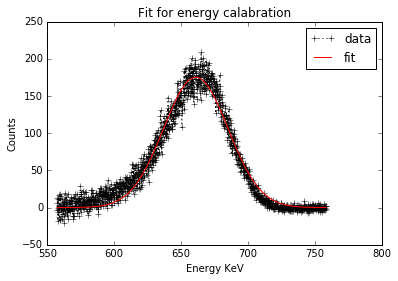

In [16]:
x = k*xval0
y = test

ypeak = max(y)
position = np.where(y == y.max())
pos = position[0][0]
xpeak = x[pos]


def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[ypeak,xpeak,1])

fitt = popt

plt.plot(x,y,'k+:',label='data')
plt.plot(x,gaus(x,*fitt),'r',label='fit')
plt.legend()
plt.title('Fit for energy calabration')
plt.xlabel('Energy KeV')
plt.ylabel('Counts')

print('Peak Height =',fitt[0])
print('Peak Position =',fitt[1])
print('sigma =',fitt[2])
print('FWHM =',2.355*fitt[2])
print('Energy Resolution =',2.355*fitt[2]/fitt[1]*100)
er = 2.355*fitt[2]/fitt[1]*100

plt.show()

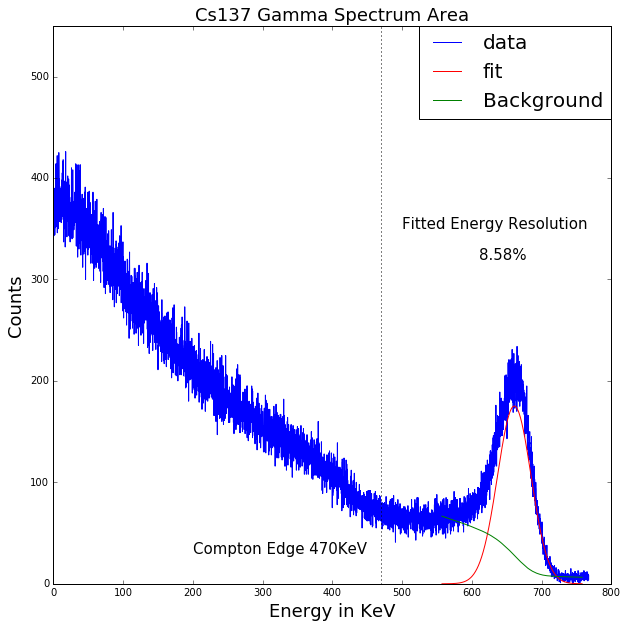

In [17]:
plt.figure(figsize=(10,10))

perc = ["%.2f" % er + '%']

plt.plot(k*xvals,data,label='data')
plt.ylim([0,550])
plt.xlim([0,800])
#plt.plot(x,y,'k+:',label='data')
plt.plot(x,gaus(x,*fitt),'r',label='fit')
plt.plot(k*xval0,background,label='Background')
plt.legend(bbox_to_anchor=(.655, 1), loc=2, borderaxespad=0.,fontsize=20)
plt.axvline(470, color='k', linestyle=':')
plt.text(200,30,'Compton Edge 470KeV',rotation=0,fontsize=15,color='k')

plt.text(500,350,'Fitted Energy Resolution',rotation=0,fontsize=15,color='k')
plt.text(610,320,perc[0] ,rotation=0,fontsize=15,color='k')

plt.xlabel('Energy in KeV', fontsize= 18)
plt.ylabel('Counts', fontsize= 18)
plt.title('Cs137 Gamma Spectrum Area', fontsize= 18)



#plt.savefig('Cs137 Spectrum1.pdf')
plt.show()

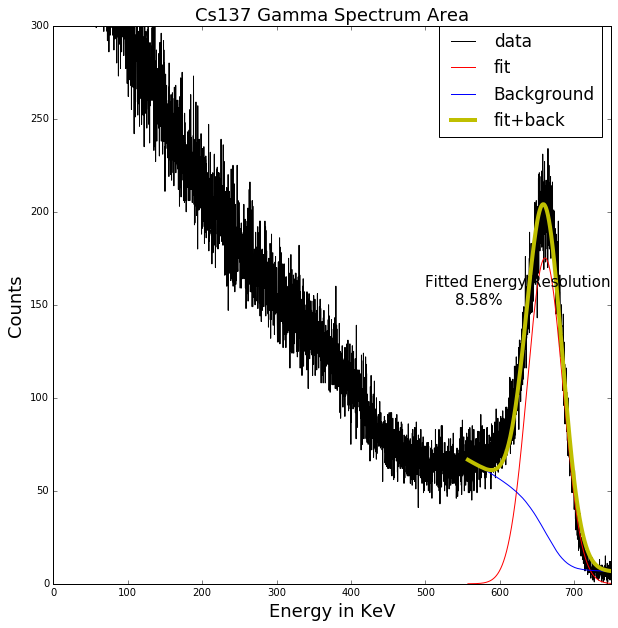

In [22]:
plt.figure(figsize=(10,10))

perc = ["%.2f" % er + '%']

plt.plot(k*xvals,data,label='data',color='k')
plt.xlim([0,750])
plt.ylim([0,300])
plt.plot(x,gaus(x,*fitt),'r',label='fit')
plt.plot(x,background,label='Background',color='b')

plt.plot(x,gaus(x,*fitt)+background,'y',label='fit+back', linewidth=4)
plt.legend(bbox_to_anchor=(.692, 1), loc=2, borderaxespad=0.,fontsize=17)

#plt.axvline(470, color='k', linestyle=':')
#plt.text(480,100,'Compton Edge 470KeV',rotation=0,fontsize=15,color='k')

plt.text(500,160,'Fitted Energy Resolution',rotation=0,fontsize=15,color='k')
plt.text(540,150,perc[0],rotation=0,fontsize=15,color='k')

plt.xlabel('Energy in KeV', fontsize= 18)
plt.ylabel('Counts', fontsize= 18)
plt.title('Cs137 Gamma Spectrum Area', fontsize= 18)



#plt.savefig('Cs137 Spectrum3.pdf')
plt.show()

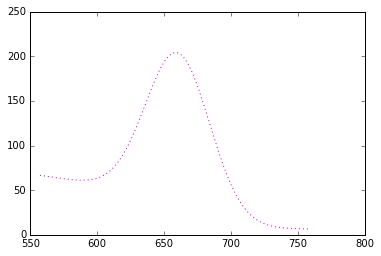

In [19]:
plt.plot(x,gaus(x,*fitt)+background,'m:',label='fit')
plt.show()

In [20]:
from scipy.stats import chisquare 
observed_values=scipy.array([18,21,16,7,15])
expected_values=scipy.array([22,19,44,8,16])
 
chisquare(observed_values, f_exp=expected_values)

NameError: name 'scipy' is not defined

In [21]:
chisquare(data0, f_exp=gaus(x,*fitt)+background)

Power_divergenceResult(statistic=2305.9494196623182, pvalue=8.6044333071138235e-69)

In [99]:
(18-22)**2/22+(21-19)**2/19+(16-44)**2/44+(7-8)**2/8+(15-16)**2/16

18.94348086124402

In [100]:
len(data0)

1227

In [101]:
gues=gaus(x,*fitt)+background
len(gues)

1227

In [104]:
a=data0-gues
b=a**2
c=b/gues
sum(c)

2305.9494065063686

In [105]:
gues

array([ 66.66056368,  66.61922669,  66.57446535, ...,   6.49449134,
         6.48787167,   6.4812891 ])

In [106]:
gaus(x,*fitt)

array([ 0.01666486,  0.01715939,  0.01766778, ...,  0.05417672,
        0.05271436,  0.0512891 ])

In [107]:
background

array([ 66.64389882,  66.6020673 ,  66.55679757, ...,   6.44031462,
         6.43515731,   6.43      ])

In [108]:
data0

array([ 63.,  73.,  79., ...,   4.,   9.,   9.])